# Section 09: K-Means Clustering

## 1

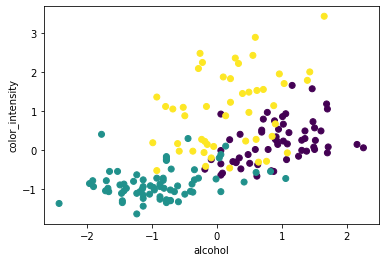

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data.
wine = datasets.load_wine()

# Scale and store in a DataFrame.
scaler = StandardScaler()
col_names = wine.feature_names
scaled_data = scaler.fit_transform(wine.data)
y = wine.target
df = pd.DataFrame(data=scaled_data, columns=col_names)

# Make a scatter plot of the first 2 features.
index1 = 0
index2 = 9
plt.scatter(df.iloc[:,index1], df.iloc[:,index2], c=y)
plt.xlabel(col_names[index1])
plt.ylabel(col_names[index2])
plt.show()

## 2

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


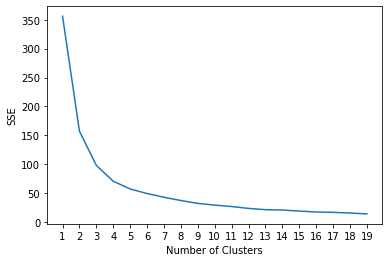

In [7]:
from sklearn.cluster import KMeans

# Initialize.
sse = []
num_clus = range(1,20)
X = df.iloc[:,[index1,index2]]

# Fit models, store SSEs.
for k in num_clus:
    kmeans = KMeans(n_clusters=k, n_init=100, init='random')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
 
# Plot.
plt.plot(num_clus, sse)
plt.xticks(num_clus)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## 3

SSE for k-Means model:  97.87911057496162


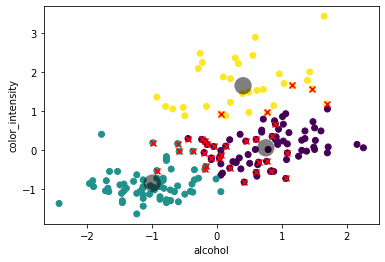

In [8]:
from sklearn.cluster import KMeans

# Run KMeans.
kmeans = KMeans(init='random', n_clusters=3, n_init=100, random_state=2)
kmeans.fit(X)

# Diagnostics.
# SSE.
print('SSE for k-Means model: ', kmeans.inertia_)
# Predictions.
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=kmeans.labels_)
plt.xlabel(col_names[index1])
plt.ylabel(col_names[index2])
# Centers.
C = kmeans.cluster_centers_
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');
# Discrepancies.
discrepancy  = X.iloc[kmeans.labels_ != y]
plt.scatter(discrepancy.iloc[:,0],discrepancy.iloc[:,1], marker='x', c='red')
plt.show()

## 4

In [4]:
import numpy as np

# X: Data.
# k: Number of means to fit.
# init_centroids: Initial cluster centers.
# tol: Tolerance for difference between old and new cluster-center estimates as measured by Frobenius norm.
# max_iter: Maximum number of iterations.
def K_Means_Algorithm(X, k, init_centroids, tol, max_iter):
    
    # Initialize.
    centroids = init_centroids
    centroids_new = np.empty(shape=init_centroids.shape)
    
    # Iteration.
    for i in range(max_iter):
        
        # Assign to clusters.
        clusters = {keys: [] for keys in range(k)}
        for j in range(X.shape[0]):
            distances = []
            for ell in range(k):
                centroid = centroids[ell]
                dist = np.linalg.norm(centroid-X[j,:], 2)
                distances.append(dist)
            clusters[np.argmin(distances)].append(X[j,:].tolist())
            
        # Calculate new centroids
        for j in range(k):
            centroids_new[j] = np.mean(clusters[j], axis=0).tolist()
        
        # End iteration.
        dis_centroids = np.linalg.norm(centroids_new-centroids, 'fro')
        centroids = centroids_new
        if dis_centroids <= tol:
            print(dis_centroids)
            break
            
    # Calculate final clusters.
    clusters = {keys: [] for keys in range(k)}
    for j in range(X.shape[0]):
        distances = []
        for ell in range(k):
            centroid = centroids[ell]
            distances.append(np.linalg.norm(centroid-X[j,:]))
        clusters[np.argmin(distances)].append(X[j,:].tolist())
        
    return clusters, centroids

0.0
Initialization complete
Iteration 0, inertia 19.787923569816098.
Iteration 1, inertia 16.871701474187486.
Iteration 2, inertia 16.72428004342284.
Iteration 3, inertia 16.70092391622531.
Converged at iteration 3: strict convergence.


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


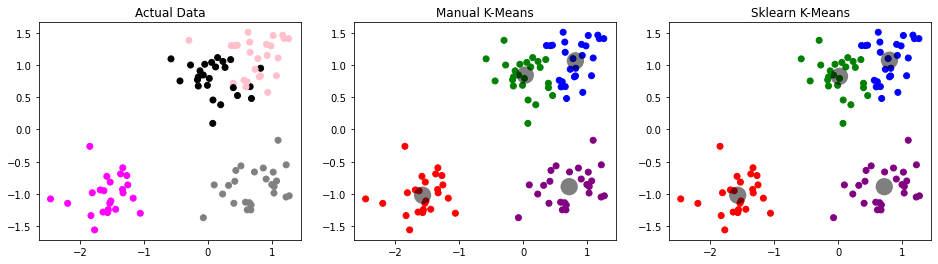

My centroids:
 [[-1.57125594 -1.0201242 ]
 [ 0.71965852 -0.88747034]
 [ 0.03397391  0.84295156]
 [ 0.81762352  1.06464298]]
sklearn's centroids:
 [[-1.57125594 -1.0201242 ]
 [ 0.71965852 -0.88747034]
 [ 0.02019958  0.82385367]
 [ 0.80019791  1.0737452 ]]


In [5]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# Initialize parameters, load data.
k = 4
init_centroids  = np.array([[-1.5, -1.0], [0.5, -1.0], [0.0, 1.0], [1.0, 1.0]])
n_samples = 100
X, y = datasets.make_blobs(n_samples=n_samples, centers=4, cluster_std=1.5, random_state = 99)
scaler = StandardScaler()
X = scaler.fit_transform(X)
colors = ListedColormap(['red', 'purple', 'green', 'blue'])

# Apply your K-Mean Clustering
clusters, centroids = K_Means_Algorithm(X, k, init_centroids, tol=1e-4, max_iter=300)
y_pred = np.zeros(n_samples)
for i in range(n_samples):
    for j in range(1,k):
        if X[i,:].tolist() in clusters[j]:
            y_pred[i] = j

# Apply sklearn's K-Means Clustering
kmeans = KMeans(verbose=1, n_clusters=k, init=init_centroids, tol=1e-4, max_iter=300, algorithm='full').fit(X)

# Visualize 
plt.figure(figsize = (16,4))
ax1  = plt.subplot(1,3,1)
ax1.scatter(X[:,0],X[:,1], c = y, cmap=ListedColormap(['black', 'gray', 'pink', 'magenta']))
ax1.set_title('Actual Data')

ax2  = plt.subplot(1,3,2)
ax2.scatter(X[:,0],X[:,1], c=y_pred, cmap=colors)
ax2.scatter(centroids[:,0],centroids[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none')
ax2.set_title('Manual K-Means')

ax3  = plt.subplot(1,3,3)
ax3.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap=colors)
C = kmeans.cluster_centers_
ax3.scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none')
ax3.set_title('Sklearn K-Means')

plt.show()

print('My centroids:\n', centroids)
print('sklearn\'s centroids:\n', C)